In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from datetime import datetime

import requests
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('data/wpi1.csv', index_col='t', parse_dates=['t'])
df.head()

,wpi,ln_wpi,d_ln_wpi
t,,,
1960-01-01,30.7,3.424263,NaN
1960-04-01,30.8,3.427515,0.003252
1960-07-01,30.7,3.424263,-0.003252
1960-10-01,30.7,3.424263,0.000000
1961-01-01,30.8,3.427515,0.003252


[Text(0.5, 1.0, 'US Wholesale Price Index - Log Difference')]

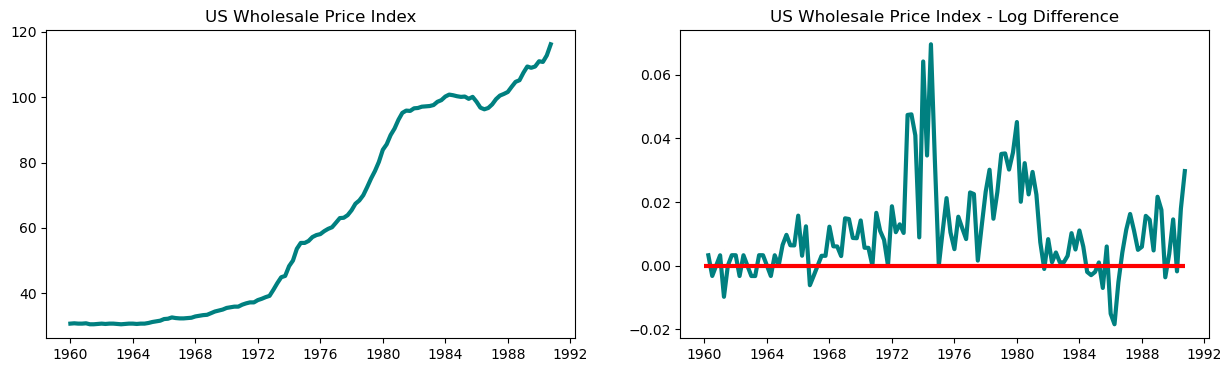

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15,4))

# levels
axs[0].plot(df.index._mpl_repr(), df['wpi'], '-', linewidth = 3, color='teal')
axs[0].set(title='US Wholesale Price Index')

# log difference
axs[1].plot(df.index._mpl_repr(), df['d_ln_wpi'], '-', linewidth = 3, color='teal')
axs[1].hlines(0, df.index[0], df.index[-1], 'r', linewidth = 3)
axs[1].set(title='US Wholesale Price Index - Log Difference')

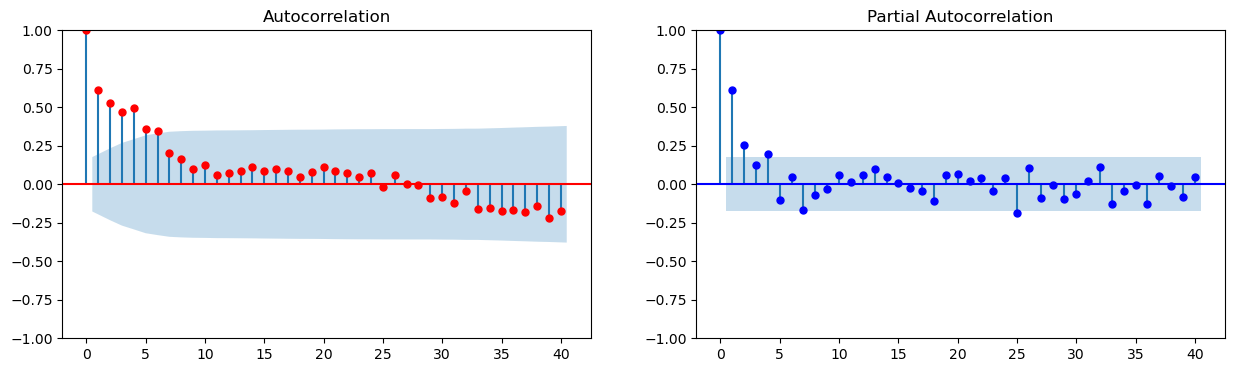

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(df.iloc[1:]['d_ln_wpi'], lags=40, ax=axs[0], color='r')
fig = sm.graphics.tsa.plot_pacf(df.iloc[1:]['d_ln_wpi'], lags=40, ax=axs[1], color='b')

In [22]:
model = sm.tsa.statespace.SARIMAX(df['ln_wpi'], trend='c', order=(1,1,1))
result = model.fit(disp=False)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 ln_wpi   No. Observations:                  124
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 382.427
Date:                Mon, 05 May 2025   AIC                           -756.854
Time:                        20:50:24   BIC                           -745.606
Sample:                    01-01-1960   HQIC                          -752.285
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.001      1.319      0.187      -0.001       0.003
ar.L1          0.8836      0.043     20.638      0.000       0.800       0.967
ma.L1         -0.4777      0.092     -5.197      0.000      -0.658      -0.298
sigma2         0.0001   9.75e-06     11.894      0.000    9.68e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.33
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.56   Skew:                             0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
df = pd.read_csv('data/air2.csv', index_col='t', parse_dates=['t'])
df.head()

,air,ln_air,d_ln_air
t,,,
1949-01-01,112,4.718499,NaN
1949-02-01,118,4.770685,0.052186
1949-03-01,132,4.882802,0.112117
1949-04-01,129,4.859812,-0.022990
1949-05-01,121,4.795791,-0.064022


In [24]:
model = sm.tsa.statespace.SARIMAX(df['ln_air'], order=(2,1,0),
                                  seasonal_order=(1,1,0,12),
                                  simple_differencing=True)
result = model.fit(disp=False)
result.summary()                

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      D.DS12.ln_air   No. Observations:                  131
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 12)   Log Likelihood                 240.821
Date:                            Mon, 05 May 2025   AIC                           -473.643
Time:                                    20:50:24   BIC                           -462.142
Sample:                                02-01-1950   HQIC                          -468.970
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4057      0.080     -5.045      0.000      -0.563      -0.248
ar.L2         -0.0799      0.099     -0.809      0.419      -0.274       0.114
ar.S.L12      -0.4723      0.072     -6.592      0.000      -0.613      -0.332
sigma2         0.0014      0.000      8.403      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.91   Prob(JB):                         0.70
Heteroskedasticity (H):               0.54   Skew:                             0.14
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
df = pd.read_csv('data/friedman2.csv', index_col='t', parse_dates=['t'])
df.head()

,consump,pc92,m1,m2
t,,,,
1946-01-01,134.9,NaN,NaN,NaN
1946-04-01,140.1,NaN,NaN,NaN
1946-07-01,148.9,NaN,NaN,NaN
1946-10-01,153.2,NaN,NaN,NaN
1947-01-01,156.6,912.1,NaN,NaN


In [26]:
endog = df.loc['1959':'1981', 'consump']
exog = sm.add_constant(df.loc['1959':'1981', 'm2'])

model = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,1))
result = model.fit(disp=False)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                consump   No. Observations:                   92
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -340.508
Date:                Mon, 05 May 2025   AIC                            691.015
Time:                        20:50:24   BIC                            703.624
Sample:                    01-01-1959   HQIC                           696.104
                         - 10-01-1981                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.0614     56.642     -0.637      0.524    -147.078      74.956
m2             1.1220      0.036     30.825      0.000       1.051       1.193
ar.L1          0.9348      0.041     22.717      0.000       0.854       1.016
ma.L1          0.3091      0.089      3.488      0.000       0.135       0.483
sigma2        93.2553     10.889      8.565      0.000      71.914     114.596
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                23.49
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):              22.51   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
df = df.loc[:'1981']

endog = df.loc['1959':, 'consump']
exog = sm.add_constant(df.loc['1959':, 'm2'])

model = sm.tsa.statespace.SARIMAX(endog.loc[:'1978-01-01'],
                                  exog=exog.loc[:'1978-01-01'],
                                  order=(1,0,1))
result = model.fit(disp=False)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                consump   No. Observations:                   77
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -243.316
Date:                Mon, 05 May 2025   AIC                            496.633
Time:                        20:50:24   BIC                            508.352
Sample:                    01-01-1959   HQIC                           501.320
                         - 01-01-1978                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6778     18.492      0.037      0.971     -35.565      36.921
m2             1.0379      0.021     50.329      0.000       0.997       1.078
ar.L1          0.8775      0.059     14.859      0.000       0.762       0.993
ma.L1          0.2771      0.108      2.572      0.010       0.066       0.488
sigma2        31.6979      4.683      6.769      0.000      22.520      40.876
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 6.05
Prob(Q):                              0.57   Prob(JB):                         0.05
Heteroskedasticity (H):               6.09   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
model = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,1))
result2 = model.filter(result.params)

predict = result2.get_prediction()
predict_ci = predict.conf_int()
predict_dy = result2.get_prediction(dynamic='1978-01-01')
predict_dy_ci = predict_dy.conf_int()

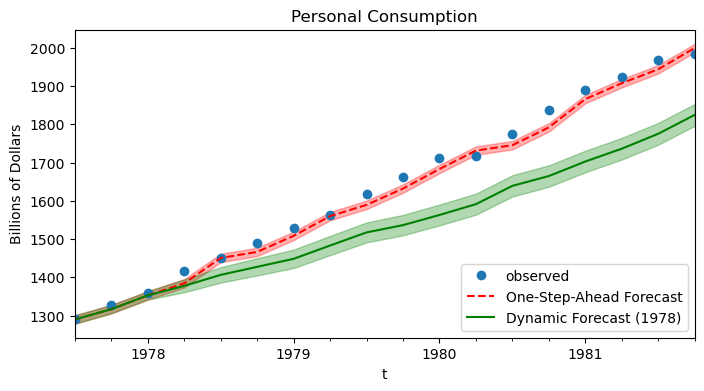

In [29]:
fig, axs = plt.subplots(figsize=(8,4))
npre = 4
axs.set(title='Personal Consumption', xlabel='Date', ylabel='Billions of Dollars')
df.loc['1977-07-01':, 'consump'].plot(ax=axs, style='o', label='observed')

ci = predict_ci.loc['1977-07-01':]
dy_ci = predict_dy_ci.loc['1977-07-01':]
predict.predicted_mean.loc['1977-07-01':].plot(ax=axs, style='r--',
                                               label='One-Step-Ahead Forecast')
predict_dy.predicted_mean.loc['1977-07-01':].plot(ax=axs, style='g',
                                                 label='Dynamic Forecast (1978)')
axs.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='r', alpha=0.3)
axs.fill_between(dy_ci.index, dy_ci.iloc[:, 0], dy_ci.iloc[:, 1], color='g', alpha=0.3)
legend = axs.legend(loc='lower right')

In [30]:
np.random.seed(123)
arparams = np.array([0.75])
maparams = np.array([0.65])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]
nobs = 1000

y = sm.tsa.arma_generate_sample(ar, ma, nobs)
model = sm.tsa.ARIMA(y, order=(1,0,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1419.548
Date:                Mon, 05 May 2025   AIC                           2847.097
Time:                        20:50:25   BIC                           2866.728
Sample:                             0   HQIC                          2854.558
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2633      0.218     -1.209      0.227      -0.690       0.164
ar.L1          0.7565      0.021     35.256      0.000       0.714       0.799
ma.L1          0.6736      0.026     26.377      0.000       0.624       0.724
sigma2         0.9989      0.045     22.247      0.000       0.911       1.087
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.89   Prob(JB):                         0.91
Heteroskedasticity (H):               1.00   Skew:                            -0.03
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
np.random.seed(123)
arparams = np.array([0.75])
maparams = np.array([0.65])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]
nobs = 1000

y = sm.tsa.arma_generate_sample(ar, ma, nobs)
y_diff = np.diff(y)
model = sm.tsa.ARIMA(y, order=(1,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1472.519
Date:                Mon, 05 May 2025   AIC                           2951.039
Time:                        20:50:25   BIC                           2965.759
Sample:                             0   HQIC                          2956.634
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1929      0.050     -3.856      0.000      -0.291      -0.095
ma.L1          0.7366      0.033     22.097      0.000       0.671       0.802
sigma2         1.1158      0.050     22.322      0.000       1.018       1.214
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.71   Prob(JB):                         1.00
Heteroskedasticity (H):               0.99   Skew:                            -0.00
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
np.random.seed(123)
arparams = np.array([0.75])
maparams = np.array([0.65])
seasonal_arparams = np.array([0.35])
seasonal_maparams = np.array([0.25])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]
seasonal_ar = np.r_[1, -seasonal_arparams]
seasonal_ma = np.r_[1, seasonal_maparams]
nobs = 1000

arma_process = sm.tsa.arma_generate_sample(ar, ma, nobs)
seasonal_arma_process = sm.tsa.arma_generate_sample(seasonal_ar, seasonal_ma, nobs)
y = arma_process + seasonal_arma_process

model = sm.tsa.SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1472.519
Date:                Mon, 05 May 2025   AIC                           2951.039
Time:                        20:50:28   BIC                           2965.759
Sample:                             0   HQIC                          2956.634
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1929      0.050     -3.856      0.000      -0.291      -0.095
ma.L1          0.7366      0.033     22.097      0.000       0.671       0.802
sigma2         1.1158      0.050     22.322      0.000       1.018       1.214
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.71   Prob(JB):                         1.00
Heteroskedasticity (H):               0.99   Skew:                            -0.00
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
import arch

np.random.seed(123)
eps = np.random.normal(size=1000)
var = np.zeros_like(eps)
for t in range(1, len(eps)):
    var[t] = 0.1 + 0.8*var[t-1] + 0.1*eps[t-1]**2
y = np.sqrt(var)*eps

model = arch.arch_model(y, vol='GARCH', p=1, q=1)
results = model.fit()
results.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 54635151658.466125
Iteration:      2,   Func. Count:     14,   Neg. LLF: 21459.934840429858
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1411.91567455377
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1427.070847500485
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1403.1890492631119
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1403.188742742116
Iteration:      7,   Func. Count:     49,   Neg. LLF: 1403.1887098711313
Iteration:      8,   Func. Count:     54,   Neg. LLF: 1403.188706074484
Iteration:      9,   Func. Count:     58,   Neg. LLF: 1403.1887060748136
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1403.188706074484
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1403.19
Distribution:                  Normal   AIC:                           2814.38
Method:            Maximum Likelihood   BIC:                           2834.01
                                        No. Observations:                 1000
Date:                Mon, May 05 2025   Df Residuals:                      999
Time:                        20:50:29   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0331  3.088e-02     -1.071      0.284 [-9.360e-02,2.743e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1531  6.866e-02      2.230  2.577e-02 [1.852e-02,  0.288]
alpha[1]       0.0599  2.260e-02      2.649  8.068e-03 [1.558e-02,  0.104]
beta[1]        0.7838  8.189e-02      9.571  1.057e-21   [  0.623,  0.944]
==========================================================================

Covariance estimator: robust
"""